In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import models,backend
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [5]:
xtrain=train.drop(['label'],axis=1).values
ytrain=train['label'].values

In [6]:
xtrain.shape

(50000, 3072)

In [21]:
xtrain = xtrain.reshape(50000,32,32,3).astype('float32')/255

In [8]:
ytrain.shape

(50000,)

In [19]:
test=pd.read_csv('test.csv')
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [22]:
model= models.Sequential(
    [
        Flatten(input_shape=(32,32,3)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

sgd=SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455,946 (1.74 MB)

 Trainable params: 455,946 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history= model.fit(xtrain,ytrain,epochs=11,batch_size=64,validation_split=(0.2))

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0966 - loss: 2.3032 - val_accuracy: 0.0977 - val_loss: 2.3033
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0962 - loss: 2.3031 - val_accuracy: 0.0997 - val_loss: 2.3029
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0955 - loss: 2.3031 - val_accuracy: 0.0997 - val_loss: 2.3028
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0975 - loss: 2.3030 - val_accuracy: 0.0980 - val_loss: 2.3029
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0990 - loss: 2.3029 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1039 - loss: 2.3026 - val_accuracy: 0.1022 - val_loss: 2.3029
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.0977 - val_loss: 2.3026
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0980 - loss: 2.3030 - val_accuracy: 0.

In [35]:
xtest=test.values

In [36]:
xtest=xtest.reshape(10000,32,32,3).astype('float32')/255

In [37]:
predictions= model.predict(xtest)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.09629035, 0.09726302, 0.09715179, ..., 0.10313556, 0.0859938 ,
        0.09794265],
       [0.09372227, 0.09305795, 0.10068954, ..., 0.10387407, 0.0871654 ,
        0.08807607],
       [0.08830312, 0.09407064, 0.09989753, ..., 0.10703177, 0.08663579,
        0.09297491],
       ...,
       [0.09529743, 0.10191937, 0.09769665, ..., 0.1041619 , 0.09122445,
        0.09575143],
       [0.09718075, 0.09569327, 0.09767402, ..., 0.10395954, 0.08711389,
        0.09237738],
       [0.09613641, 0.09904412, 0.09618191, ..., 0.10647219, 0.09564389,
        0.09672145]], dtype=float32)

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

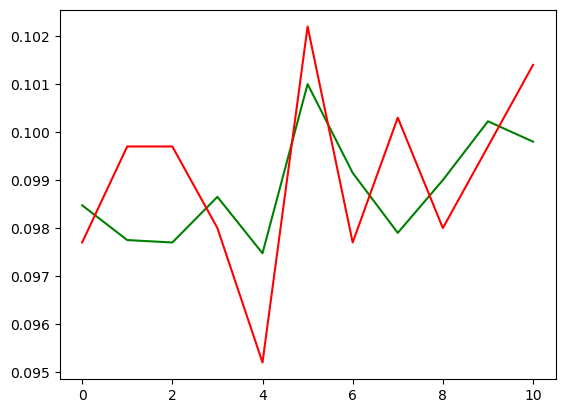

In [39]:
plt.plot(history.history['accuracy'],label='accuray',color='green')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='red')
plt.show()

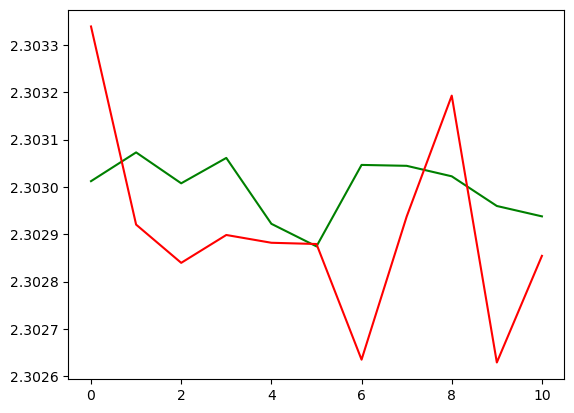

In [40]:
plt.plot(history.history['loss'],label = 'loss',color='green')
plt.plot(history.history['val_loss'], label = 'val_loss', color='red')
plt.show()